In [ ]:
# --- 1. Εγκατάσταση από GitHub ---
!pip install git+https://github.com/robertmartin8/PyPortfolioOpt.git

# --- 2. Υπόλοιπες απαραίτητες βιβλιοθήκες ---
!pip install yfinance matplotlib pandas numpy

# --- 3. Εισαγωγή βιβλιοθηκών ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from pypfopt import EfficientFrontier, risk_models, expected_returns, plotting
from datetime import datetime, timedelta
from scipy.stats import norm

  Cloning https://github.com/robertmartin8/PyPortfolioOpt.git to /tmp/pip-req-build-6wlrtjqo
  Running command git clone --filter=blob:none --quiet https://github.com/robertmartin8/PyPortfolioOpt.git /tmp/pip-req-build-6wlrtjqo
  Resolved https://github.com/robertmartin8/PyPortfolioOpt.git to commit 65cabcee11d91777d63628744c36869ec64a1c85
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyportfolioopt: filename=pyportfolioopt-1.5.6-py3-none-any.whl size=62666 sha256=0b40098fba092e708adfbbac124f13db2e47fa83c166904afea13adca21d9413
  Stored in directory: /tmp/pip-ephem-wheel-cache-r3p3uy1_/wheels/fb/ce/b5/02542dd1fd3a76e4df96e0e99a11cd0f2009bee8700affdbd1
Successfully built pyportfolioopt


[*********************100%***********************]  5 of 5 completed


Τιμές κλεισίματος:
Ticker            AAPL       GOOGL        META        MSFT        NVDA
Date                                                                  
2025-04-01  222.897705  157.070007  586.000000  381.489655  110.150002
2025-04-02  223.596786  157.039993  583.929993  381.439758  110.419998
2025-04-03  202.923904  150.720001  531.619995  372.426270  101.800003
2025-04-04  188.133301  145.600006  504.730011  359.180603   94.309998
2025-04-07  181.222366  146.750000  516.250000  357.204224   97.639999

Ημερήσιες αποδόσεις:
Ticker          AAPL     GOOGL      META      MSFT      NVDA
Date                                                        
2025-04-02  0.003136 -0.000191 -0.003532 -0.000131  0.002451
2025-04-03 -0.092456 -0.040244 -0.089583 -0.023630 -0.078066
2025-04-04 -0.072887 -0.033970 -0.050581 -0.035566 -0.073576
2025-04-07 -0.036734  0.007898  0.022824 -0.005502  0.035309
2025-04-08 -0.049818 -0.013969 -0.011235 -0.009221 -0.013724

Αναμενόμενες αποδόσεις (CAPM):
Tic

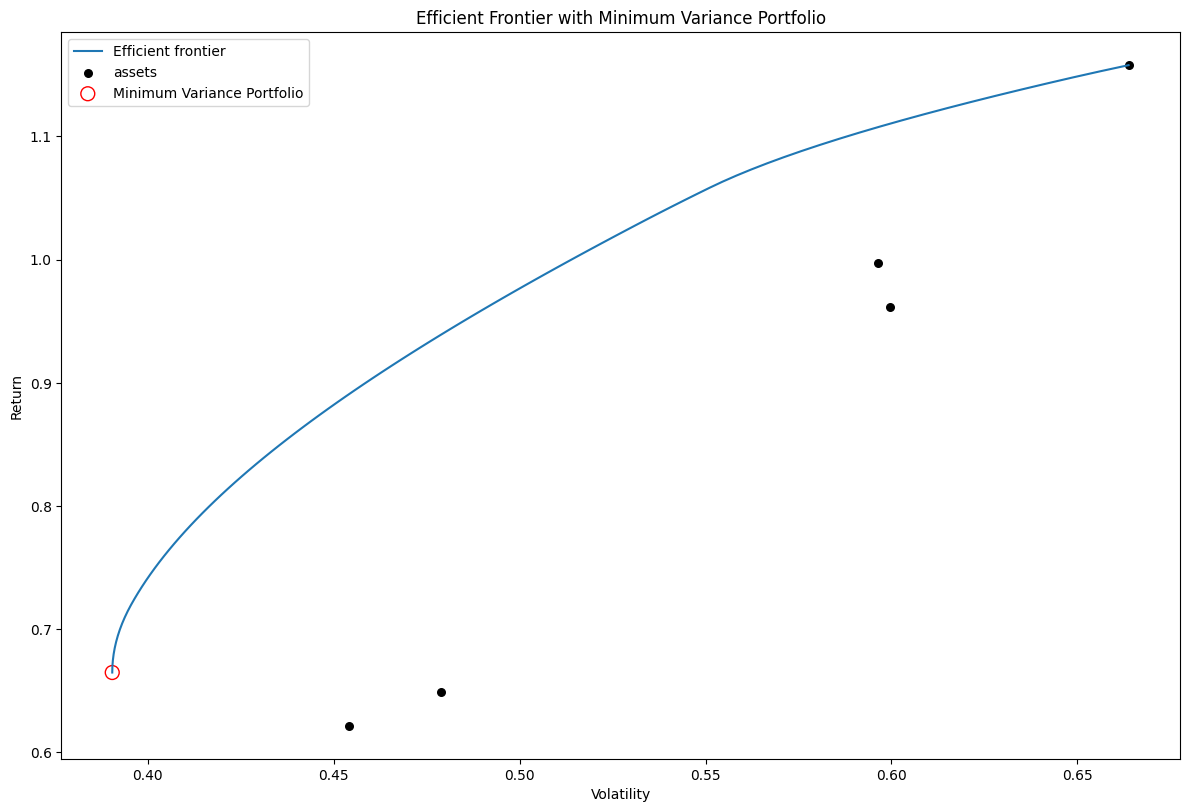


Αναμενόμενη απόδοση MVP: 66.48%
Κίνδυνος (volatility) MVP: 39.05%

Έχοντας ένα χαρτοφυλάκιο αξίας 1,000.00 €,
με πιθανότητα 5%, το μέγιστο που μπορεί να χάσει το χαρτοφυλάκιο σε 30 ημέρες είναι:
- Με Historical VaR: 0.32 €
- Με Gaussian VaR:    0.38 €

Ενδιαφέρομαι για την πιθανότητα να χάσω πάνω από 1.00 €,
δηλαδή πάνω από 0.10% της αξίας του χαρτοφυλακίου.

Historical Probability: 46.15%
Gaussian Probability:    42.96%


In [ ]:
# --- 12. Ρυθμίσεις για VaR ---
portfolio_value = 1000  # Αξία χαρτοφυλακίου
confidence_level = 0.95   # Επίπεδο εμπιστοσύνης
horizon = 30              # Χρονικός ορίζοντας (σε ημέρες)
D = 1  # Ελάχιστη ζημιά που μας ενδιαφέρει (π.χ. €3,000)




# --- 4. Φόρτωση δεδομένων από Yahoo Finance ---
tickers = ["AAPL", "MSFT", "META", "GOOGL", "NVDA"]  # Μπορείς να αλλάξεις ή να προσθέσεις μετοχές
start_date = "2025-04-01"
end_date = datetime.today().strftime('%Y-%m-%d')

data = yf.download(tickers, start=start_date, end=end_date)['Close']
print("Τιμές κλεισίματος:")
print(data.head())

# --- 5. Υπολογισμός ημερήσιων αποδόσεων ---
returns = data.pct_change().dropna()
print("\nΗμερήσιες αποδόσεις:")
print(returns.head())

# --- 6. Αναμενόμενες αποδόσεις - CAPM model ---
mu = expected_returns.capm_return(data)
print("\nΑναμενόμενες αποδόσεις (CAPM):")
print(mu)

# --- 7. Πίνακας συνδιακύμανσης (Ledoit-Wolf shrinkage) ---
S = risk_models.CovarianceShrinkage(data).ledoit_wolf()
print("\nΠίνακας συνδιακύμανσης:")
print(S)

# --- 8. Κατασκευή Efficient Frontier ---
ef = EfficientFrontier(mu, S)

fig, ax = plt.subplots(figsize=(12, 8))
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)

# --- 9. Minimum Variance Portfolio ---
ef_min_vol = EfficientFrontier(mu, S)
min_vol_weights = ef_min_vol.min_volatility()
min_vol_cleaned = ef_min_vol.clean_weights()

# Εκτύπωση βαρών
print("\nMinimum Variance Portfolio - Βάρη:")
print(min_vol_cleaned)

# Απόδοση και κίνδυνος
ret_min, vol_min, _ = ef_min_vol.portfolio_performance()
ax.scatter(vol_min, ret_min, edgecolors='r', s=100, c='none', label='Minimum Variance Portfolio')
ax.legend()
plt.title("Efficient Frontier with Minimum Variance Portfolio")
plt.show()

# --- 10. Εκτύπωση απόδοσης και κινδύνου MVP ---
print(f"\nΑναμενόμενη απόδοση MVP: {ret_min*100:.2f}%")
print(f"Κίνδυνος (volatility) MVP: {vol_min*100:.2f}%")

# --- 11. Αποδόσεις portfolio ---
portfolio_returns = returns @ list(min_vol_cleaned.values())



# Historical VaR (5%)
var_hist_5 = -np.percentile(portfolio_returns, 5)
var_hist_abs = var_hist_5 * portfolio_value / 100
#print(f"\nHistorical VaR (5%) = {var_hist_5*100:.2f}%")

# Gaussian VaR (5%)
mean = portfolio_returns.mean()
std_dev = portfolio_returns.std()
var_gauss_5 = -(mean + std_dev * norm.ppf(0.05))
var_gauss_abs = var_gauss_5 * portfolio_value / 100
#print(f"Gaussian VaR (5%) = {var_gauss_5*100:.2f}%")

# --- 13. Εκτύπωση με λόγια και αριθμούς ---
print(f"\nΈχοντας ένα χαρτοφυλάκιο αξίας {portfolio_value:,.2f} €,")
print(f"με πιθανότητα {(1 - confidence_level)*100:.0f}%, το μέγιστο που μπορεί να χάσει το χαρτοφυλάκιο σε {horizon} ημέρες είναι:")
print(f"- Με Historical VaR: {var_hist_abs:,.2f} €")
print(f"- Με Gaussian VaR:    {var_gauss_abs:,.2f} €")



# Μετατροπή του D σε ποσοστό
D_pct = (D / portfolio_value) * 100

print(f"\nΕνδιαφέρομαι για την πιθανότητα να χάσω πάνω από {D:,.2f} €,")
print(f"δηλαδή πάνω από {D_pct:.2f}% της αξίας του χαρτοφυλακίου.")

# --- 13. Historical Probability of loss > D% ---
losses_exceeding_D = portfolio_returns[portfolio_returns < -D_pct / 100]
historical_prob = len(losses_exceeding_D) / len(portfolio_returns)

print(f"\nHistorical Probability: {historical_prob*100:.2f}%")

# --- 14. Parametric (Gaussian) Probability of loss > D% ---
mean = portfolio_returns.mean()
std_dev = portfolio_returns.std()

# Ζημιά σε ποσοστό για να χάσω > D
threshold = -D_pct / 100
gaussian_prob = norm.cdf((threshold - mean) / std_dev)

print(f"Gaussian Probability:    {gaussian_prob*100:.2f}%")